# Lecture : Graph Clustering

## Lab 05 : PCut -- Solution

### Xavier Bresson, Jiaming Wang


In [1]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/CS5284_2025_codes/codes/03_Graph_Clustering'
    print(path_to_file)
    # change current path to the folder containing "path_to_file"
    os.chdir(path_to_file)
    !pwd
    

In [2]:
# Load libraries
import numpy as np
import scipy.io
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
import time
import sys; sys.path.insert(0, 'lib/')
from lib.utils import construct_kernel
from lib.utils import compute_kernel_kmeans_EM
from lib.utils import compute_kernel_kmeans_spectral
from lib.utils import compute_purity
from lib.utils import construct_knn_graph
from lib.utils import compute_ncut
from lib.utils import compute_pcut
from lib.utils import graph_laplacian
import warnings; warnings.filterwarnings("ignore")


### Two-moon dataset

2000 100 2


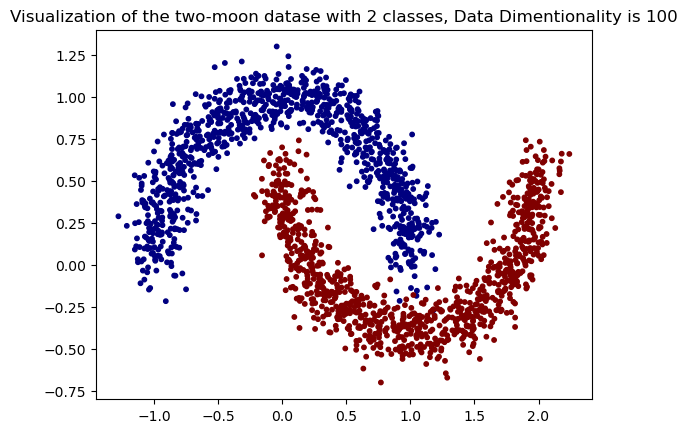

In [3]:
# Load raw data images
mat = scipy.io.loadmat('datasets/two_moons.mat')
X = mat['X']
n = X.shape[0]
d = X.shape[1]
Cgt = mat['Cgt']-1; Cgt=Cgt.squeeze()
nc = len(np.unique(Cgt))
print(n,d,nc)

# Plot
plt.figure(1)
size_vertex_plot = 10
plt.scatter(X[:,0], X[:,1], s=size_vertex_plot*np.ones(n), c=Cgt, cmap='jet')
plt.title('Visualization of the two-moon datase with 2 classes, Data Dimentionality is 100')
plt.show()


### Question 1: Determine the optimal value of k for the k-NN graph in the spectral NCut technique

What value of k gives the best clustering results?


k-NN graph with euclidean distance


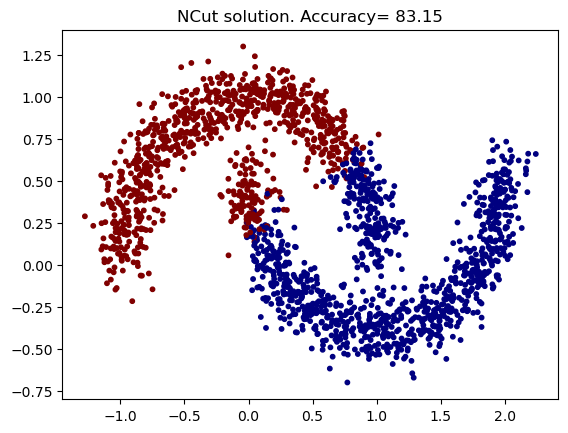

In [4]:
# Run NCut 
k = 10
W = construct_knn_graph(X, k, 'euclidean')
C_ncut, _ = compute_ncut(W, Cgt, nc)

# Plot
plt.figure(2)
size_vertex_plot = 10
plt.scatter(X[:,0], X[:,1], s=size_vertex_plot*np.ones(n), c=C_ncut, cmap='jet')
plt.title('NCut solution. Accuracy= ' + 
          str(compute_purity(C_ncut, Cgt, nc))[:6] )
plt.show()


### Question 2: Evaluate the PCut technique with different values of k for the k-NN graph

What value ofk produces the most effective clustering result?

Additionally, what is the range of k that provides optimal clustering performance?


k-NN graph with euclidean distance


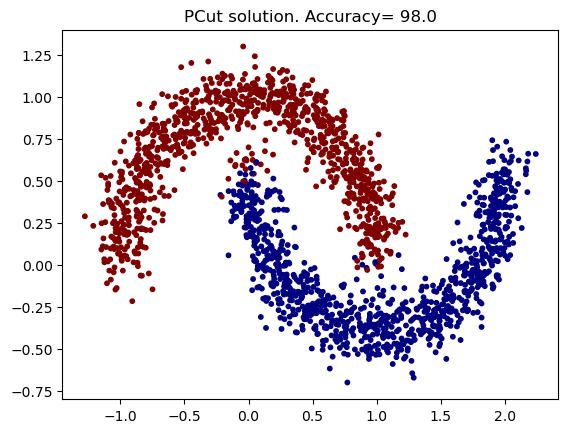

In [5]:
# Run PCut
k = 10
W = construct_knn_graph(X, k, 'euclidean')
C_pcut, _ = compute_pcut(W, Cgt, nc, 2, 200)

# Plot
plt.figure(3)
size_vertex_plot = 10
plt.scatter(X[:,0], X[:,1], s=size_vertex_plot*np.ones(n), c=C_pcut, cmap='jet')
plt.title('PCut solution. Accuracy= ' + 
          str(compute_purity(C_pcut, Cgt, nc))[:6] )
plt.show()


### Comment: Compare the spectral NCut and PCut techniques on two real-world graphs

Run both the Spectral NCut and PCut techniques on two real-world graphs and compare their performance.


### USPS image graph

In [6]:
# Load USPS dataset
mat = scipy.io.loadmat('datasets/USPS.mat')
W = mat['W'] # 'scipy.sparse._csc.csc_matrix'
n = W.shape[0]
Cgt = mat['Cgt']-1; Cgt=Cgt.squeeze()
nc = len(np.unique(Cgt))
print(n,nc)


9298 10


In [7]:
Cncut, acc = compute_ncut(W,Cgt,nc)
print('Ncut accuracy =',acc)


Ncut accuracy = 73.52118735211873


In [8]:
Cpcut, acc = compute_pcut(W,Cgt,nc,5,10)
print('Pcut accuracy =',acc)


Pcut accuracy = 81.68423316842332


### MIREX music graph

In [9]:
# Load USPS dataset
mat = scipy.io.loadmat('datasets/MIREX.mat')
W = mat['W'] # 'scipy.sparse._csc.csc_matrix'
n = W.shape[0]
Cgt = mat['Cgt']-1; Cgt=Cgt.squeeze()
nc = len(np.unique(Cgt))
print(n,nc)


3090 10


In [10]:
Cncut, acc = compute_ncut(W,Cgt,nc)
print('Ncut accuracy =',acc)


Ncut accuracy = 39.06148867313916


In [11]:
Cpcut, acc = compute_pcut(W,Cgt,nc,0.5,400)
print('Pcut accuracy =',acc)


Pcut accuracy = 44.530744336569576
